In [31]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%matplotlib inline

In [32]:
# Read in mapreduce output csv as a dataframe
df = pd.read_csv("Liquor_sales_reduced_items.csv",index_col=0)
df

,Item Number,Monetary,Frequency,Recent_Date
0,81206,1436789.41,30256,2020-09-30
1,22121,589275.90,7613,2020-09-30
2,57051,267184.04,2214,2020-09-29
3,4032,4567.50,63,2015-12-16
4,33783,22316.83,329,2014-10-01
...,...,...,...,...
9692,995215,320.61,4,2017-12-13
9693,995228,677.40,2,2017-09-26
9694,964469,132.00,2,2018-05-14
9695,904613,1933.20,2,2018-05-31


In [33]:
df.dtypes

Item Number     object
Monetary       float64
Frequency        int64
Recent_Date     object
dtype: object

In [34]:
#Change the format of the Recenta date column for processing
df["Recent_Date"] = pd.to_datetime(df["Recent_Date"],format = "%Y/%m/%d")

In [35]:
df["Recent_Date"].max()

Timestamp('2020-09-30 00:00:00')

In [36]:
# Limit data from 2018 to 2020
df = df[df["Recent_Date"]>"2018-01-01"]
df

,Item Number,Monetary,Frequency,Recent_Date
0,81206,1436789.41,30256,2020-09-30
1,22121,589275.90,7613,2020-09-30
2,57051,267184.04,2214,2020-09-29
5,89274,254006.31,3643,2020-09-30
6,73596,92748.40,2246,2018-08-06
...,...,...,...,...
9687,995001,855.12,3,2018-07-19
9688,916661,1656.00,3,2018-01-23
9690,64343,975.00,13,2018-07-16
9694,964469,132.00,2,2018-05-14


In [37]:
# Since we have 2 years of data, we choose 2 days after the end of September 2020 as a time stamp.The last
# purchase date made per user is subtracted from the time stamp to get the recency value.
import datetime as dt
study_date = dt.datetime(2020,10,2)
df["Recency"] = study_date - df["Recent_Date"]
df['Recency'].astype('timedelta64[D]')
df['Recency']=df['Recency'] / np.timedelta64(1, 'D')

<ipython-input-37-1503f613fc32>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-1503f613fc32>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
# Final RFM frame
df

,Item Number,Monetary,Frequency,Recent_Date,Recency
0,81206,1436789.41,30256,2020-09-30,2.0
1,22121,589275.90,7613,2020-09-30,2.0
2,57051,267184.04,2214,2020-09-29,3.0
5,89274,254006.31,3643,2020-09-30,2.0
6,73596,92748.40,2246,2018-08-06,788.0
...,...,...,...,...,...
9687,995001,855.12,3,2018-07-19,806.0
9688,916661,1656.00,3,2018-01-23,983.0
9690,64343,975.00,13,2018-07-16,809.0
9694,964469,132.00,2,2018-05-14,872.0


In [39]:
#Selection of necessary columns
finaldf = df[["Item Number","Monetary","Frequency","Recency"]]

In [40]:
finaldf

,Item Number,Monetary,Frequency,Recency
0,81206,1436789.41,30256,2.0
1,22121,589275.90,7613,2.0
2,57051,267184.04,2214,3.0
5,89274,254006.31,3643,2.0
6,73596,92748.40,2246,788.0
...,...,...,...,...
9687,995001,855.12,3,806.0
9688,916661,1656.00,3,983.0
9690,64343,975.00,13,809.0
9694,964469,132.00,2,872.0


In [41]:
# determining top 10 Items by Monetary and Frequency
Items_top10_byvalue = finaldf.sort_values(by=['Monetary'], ascending=False)
Items_top10_byvalue = Items_top10_byvalue[:10]
Items_top10_byvalue 
Items_top10_byFreq = finaldf.sort_values(by=['Frequency'], ascending=False)
Items_top10_byFreq = Items_top10_byFreq[:10]
Items_top10_byFreq

,Item Number,Monetary,Frequency,Recency
3257,11788,74647526.91,198310,2.0
824,36308,29786299.86,186130,2.0
753,35918,13996746.95,140095,2.0
4243,64858,14912050.68,117184,2.0
2110,11776,11066523.06,111440,2.0
103,43336,19940550.02,104671,2.0
650,36904,7825910.18,99609,2.0
4806,64866,18687940.11,96586,2.0
244,36306,6707062.66,95882,2.0
3670,25608,13649277.07,91837,2.0


<AxesSubplot:xlabel='Item Number'>

<Figure size 960x640 with 0 Axes>

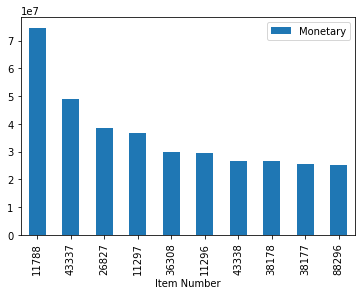

In [42]:
# Bar plot of Top Items
figure(figsize=(12, 8), dpi=80)
Items_top10_byvalue.plot(x="Item Number", y=["Monetary"], kind="bar")

<AxesSubplot:xlabel='Item Number'>

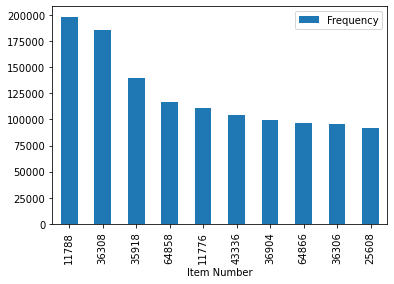

In [43]:
# Bar plot of top 10 frequent items.
Items_top10_byFreq.plot(x="Item Number", y=["Frequency"], kind="bar")

In [44]:
#Normalise the data for kmeans clustering
dfkmeans = finaldf[["Monetary","Frequency","Recency"]]

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(dfkmeans.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dfkmeans.index, columns=dfkmeans.columns)

In [45]:
X = scaled_features_df.copy()
X

,Monetary,Frequency,Recency
0,0.437735,2.600455,-0.763462
1,0.059736,0.412587,-0.763462
2,-0.083919,-0.109088,-0.760173
5,-0.089797,0.028988,-0.763462
6,-0.161719,-0.105996,1.821498
...,...,...,...
9687,-0.202704,-0.322725,1.880696
9688,-0.202347,-0.322725,2.462805
9690,-0.202651,-0.321759,1.890562
9694,-0.203027,-0.322822,2.097753


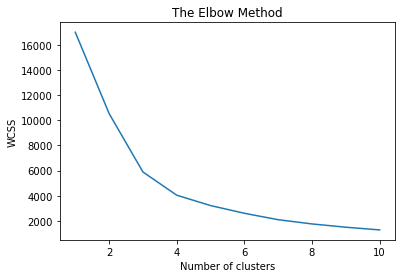

In [46]:
# Determine the optimal customer segmentation cluster by reducing the within cluster sum of squares

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
#use the kmeans cluster with 4 clusters based Elbow method where 4 clusters seem optimal
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(X)
y_hc = kmeans.fit_predict(X)

In [48]:
# Set up dataframe with cluster labels with a copy of the exisitng dataframe
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(10, random_state=0)

,Monetary,Frequency,Recency,CLUSTERS
7568,-0.200244,-0.322145,-0.747018,1
1850,-0.018247,0.303498,-0.763462,1
3021,-0.057723,-0.026957,-0.763462,1
3277,4.365453,3.367073,-0.763462,2
8951,-0.201500,-0.319053,1.936604,0
4312,-0.202277,-0.322242,2.028690,0
1657,1.133888,1.026636,-0.763462,1
8504,-0.202299,-0.321855,-0.747018,1
7168,-0.202725,-0.322822,-0.388544,1
6190,-0.090697,-0.241657,-0.756884,1


In [49]:
# Count the number of observations in each cluster
Xnew['CLUSTERS'].value_counts()

1    3898
0    1543
2     201
3      28
Name: CLUSTERS, dtype: int64

In [50]:
# prepare data for 2 axis and 3 axis visualisation
xval = Xnew.iloc[:,[0,1,2]].values
xval

array([[ 0.43773488,  2.60045486, -0.76346164],
       [ 0.05973641,  0.41258721, -0.76346164],
       [-0.08391938, -0.10908825, -0.76017289],
       ...,
       [-0.20265095, -0.32175869,  1.89056189],
       [-0.20302694, -0.32282155,  2.09775332],
       [-0.20222359, -0.32282155,  2.04184452]])

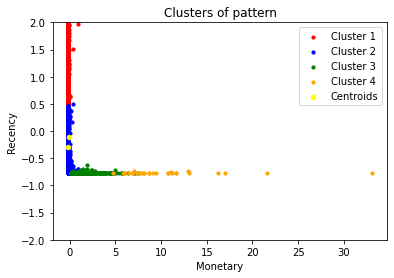

In [51]:
# Use scatter plot to 
plt.scatter(xval[y_hc == 0, 0], xval[y_hc == 0,2], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(xval[y_hc == 1, 0], xval[y_hc == 1, 2], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(xval[y_hc == 2, 0], xval[y_hc == 2, 2], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(xval[y_hc == 3, 0], xval[y_hc == 3, 2], s = 10, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of pattern')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.ylim((-2,2))
plt.legend()
plt.show()

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

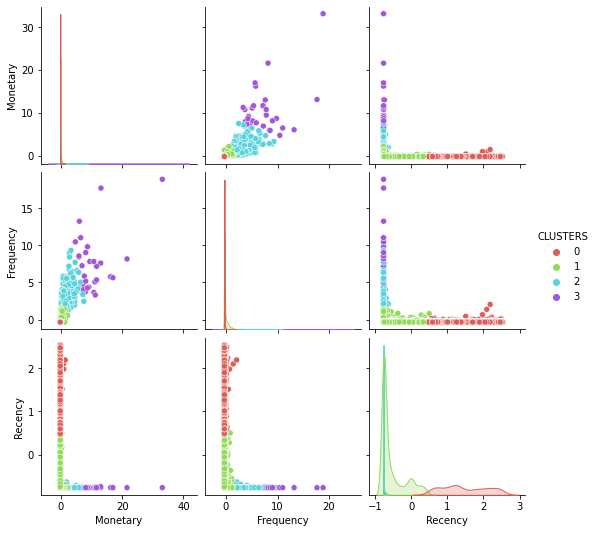

In [53]:
# Plot using seaborn for pairwise visualisation and interpretation
var = ["Monetary","Frequency","Recency"]

ax = sns.pairplot(Xnew,vars=var,hue="CLUSTERS", palette=sns.color_palette("hls",4))

plt.show()